<a href="https://colab.research.google.com/github/AkankshaB123/fraud_detection_mitigation/blob/main/Data_Pre_Processing_and_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Next Steps**

1. Classification Models
*   Logistic Regression
*   XG Boost
*   SVM's
*   Decision Trees

2. Class Imbalance Solutions
*   Under Sampling
*   Over Sampling
*   SMOTE

3. Metrics
*   Accuracy Score
*   Confusion Matrix
*   ROC_AUC
*   F1 Score














In [40]:
##Load Libraries
import pandas as pd
import matplotlib.pyplot as plt

#Machine learning
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# plot_confusion_matrix is deprecated, use ConfusionMatrixDisplay instead
from sklearn.metrics import ConfusionMatrixDisplay

#warnings
import warnings
warnings.filterwarnings("ignore")

#data visualisation library
import seaborn as sns

In [ ]:
#1. Class Imbalance Solutions for Classification Problems
#2. Principal Component Analysis
#3. AUC ROC curve for model performance
#4. Modelling process, go through the code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pandas Version: 2.2.2
Numpy Version: 2.0.2
Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2
Path to dataset files: /kaggle/input/creditcardfraud
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170 

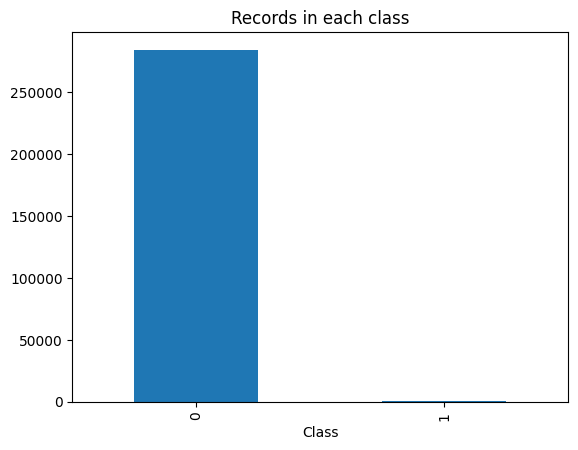

Fraud transactions are as follows 0.17 %
Normal transactions are as follows 99.83 %


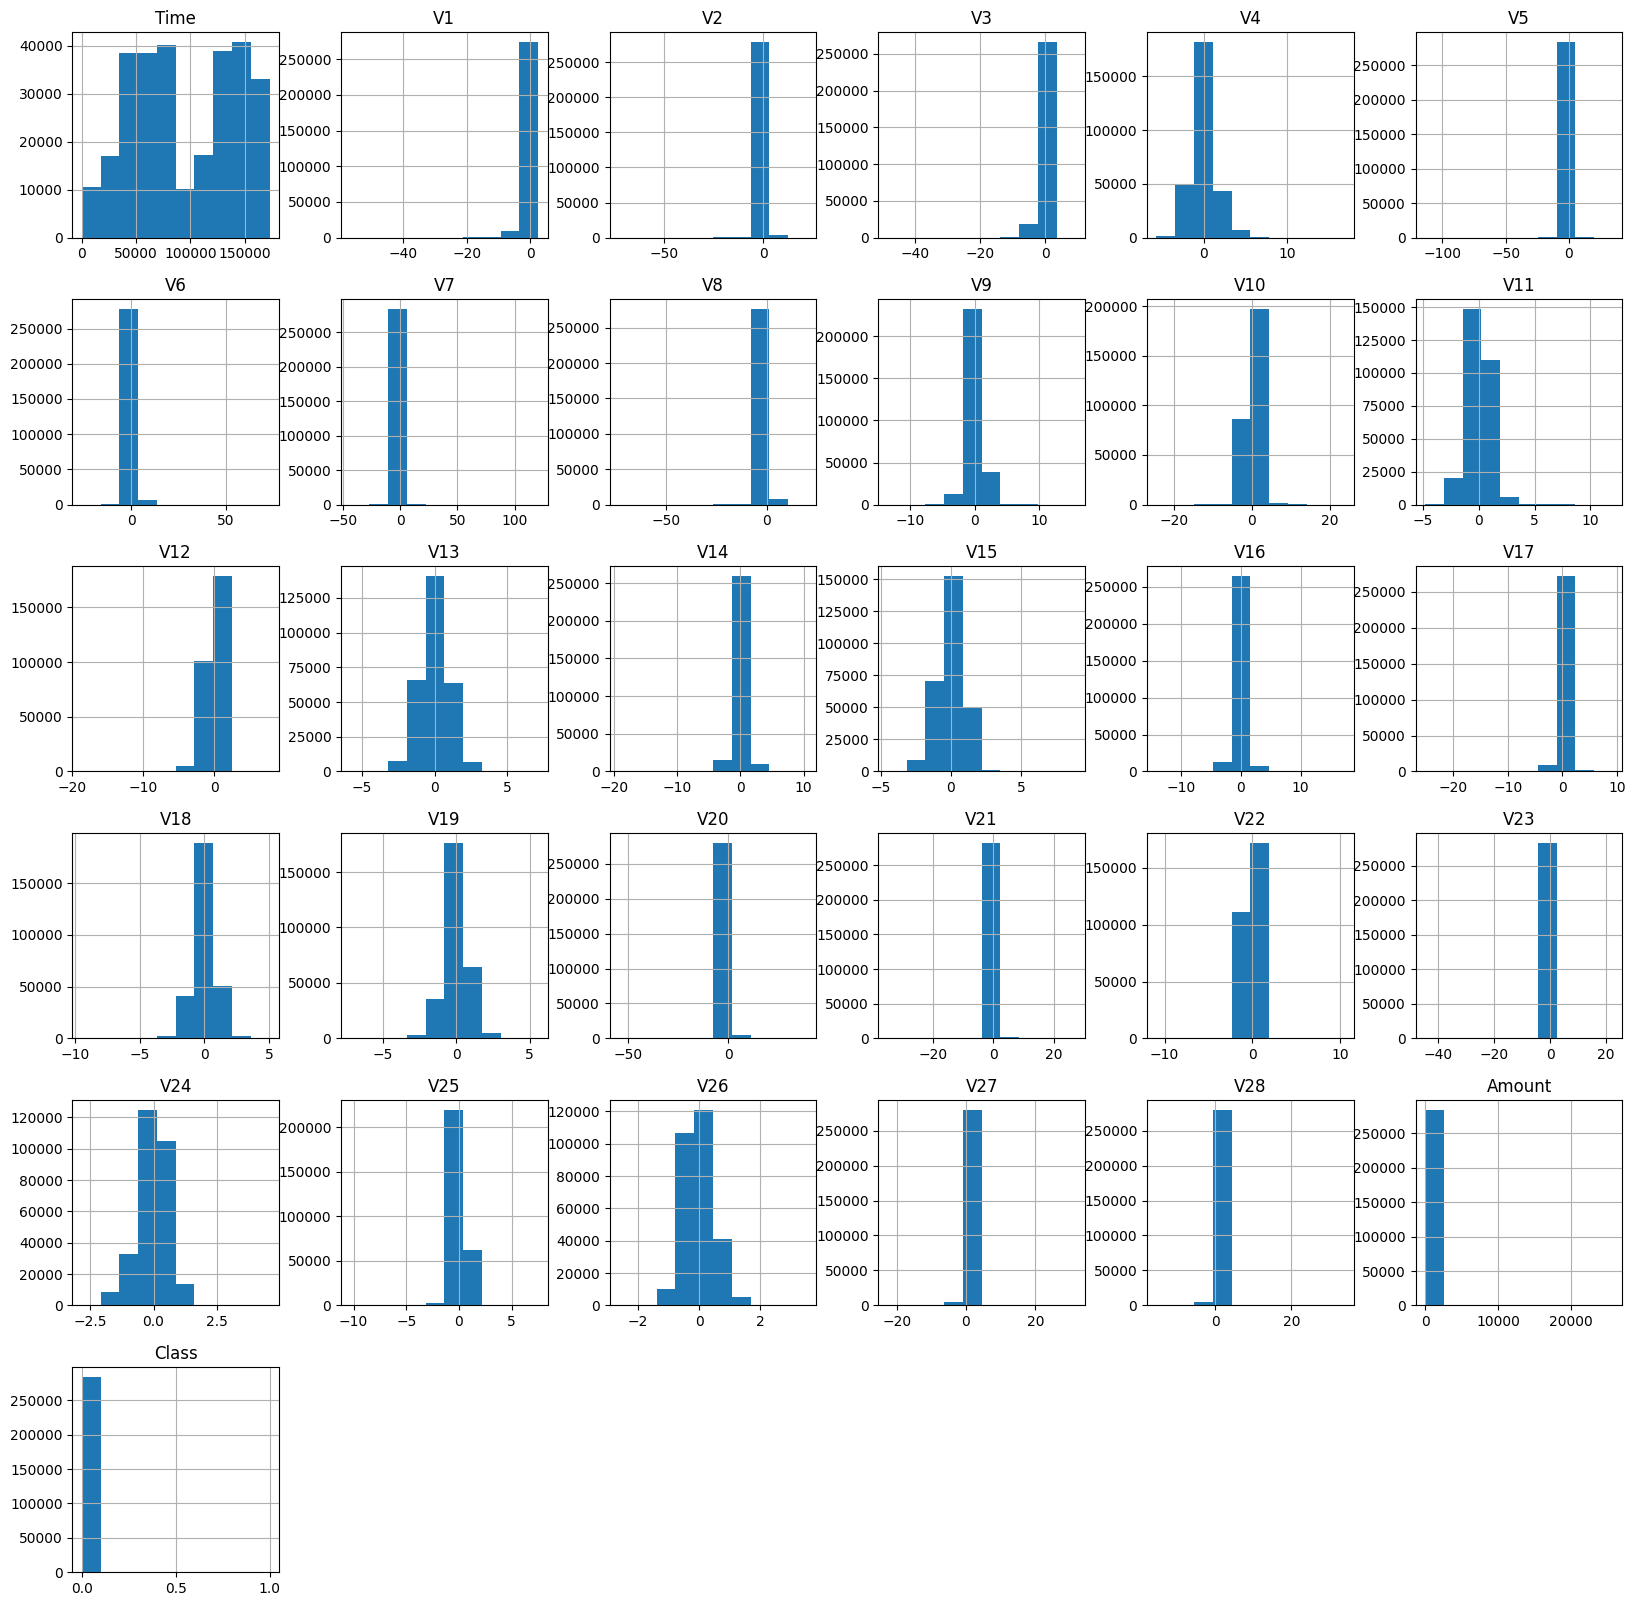

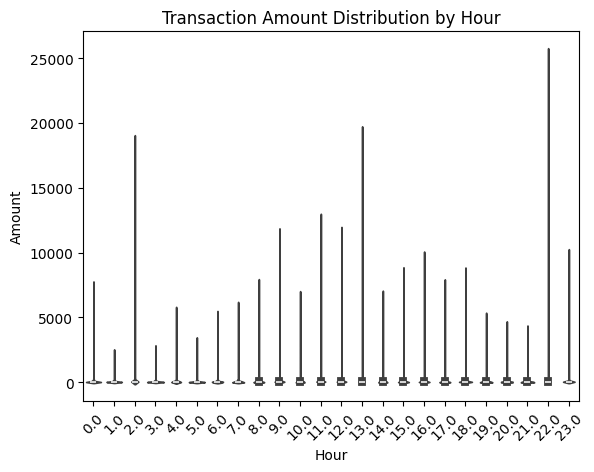

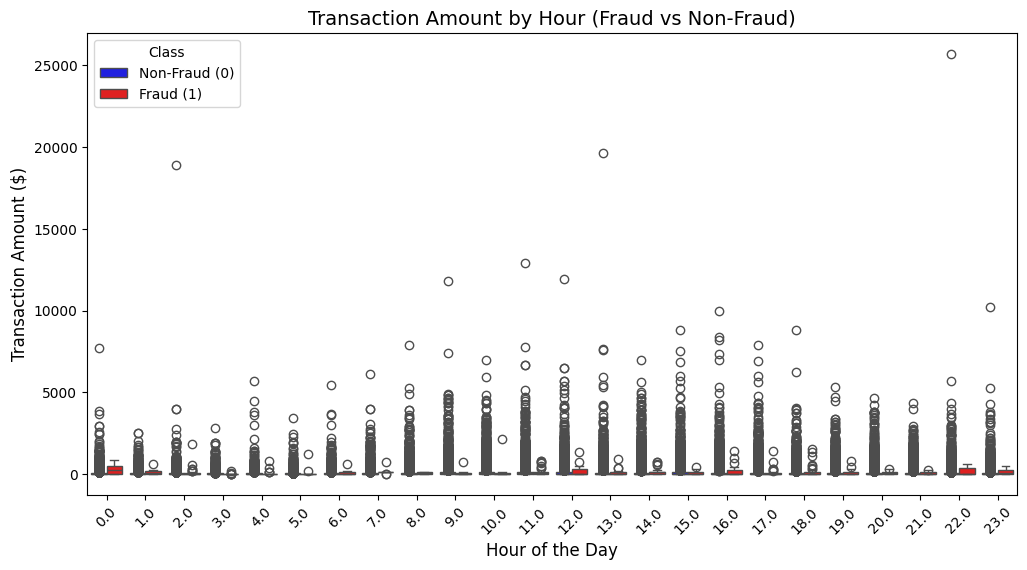

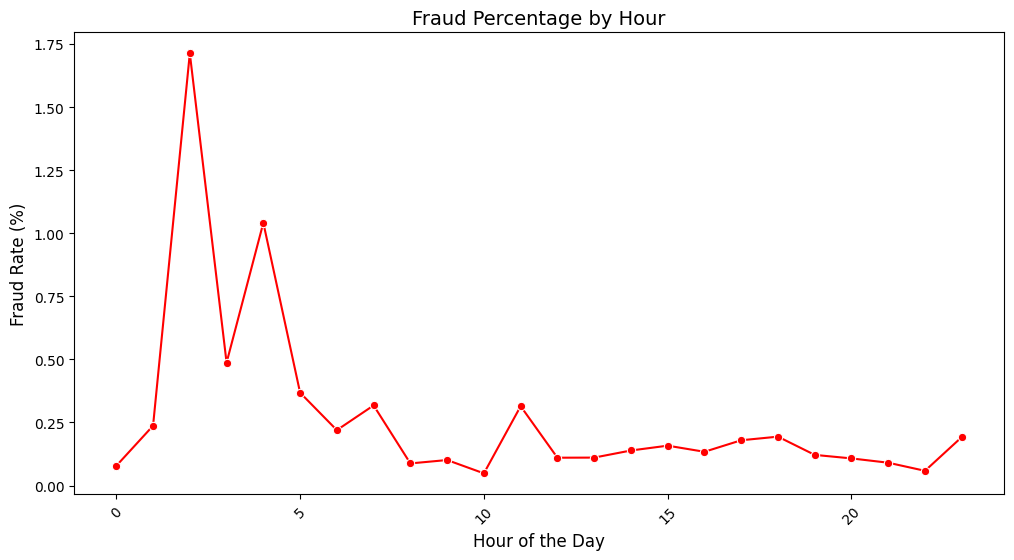

Fraud + outlier % cases are: 0.29 %
Non-Fraud + outlier % cases are: 99.71 %


KeyError: "None of [Index(['outliers'], dtype='object')] are in the [columns]"

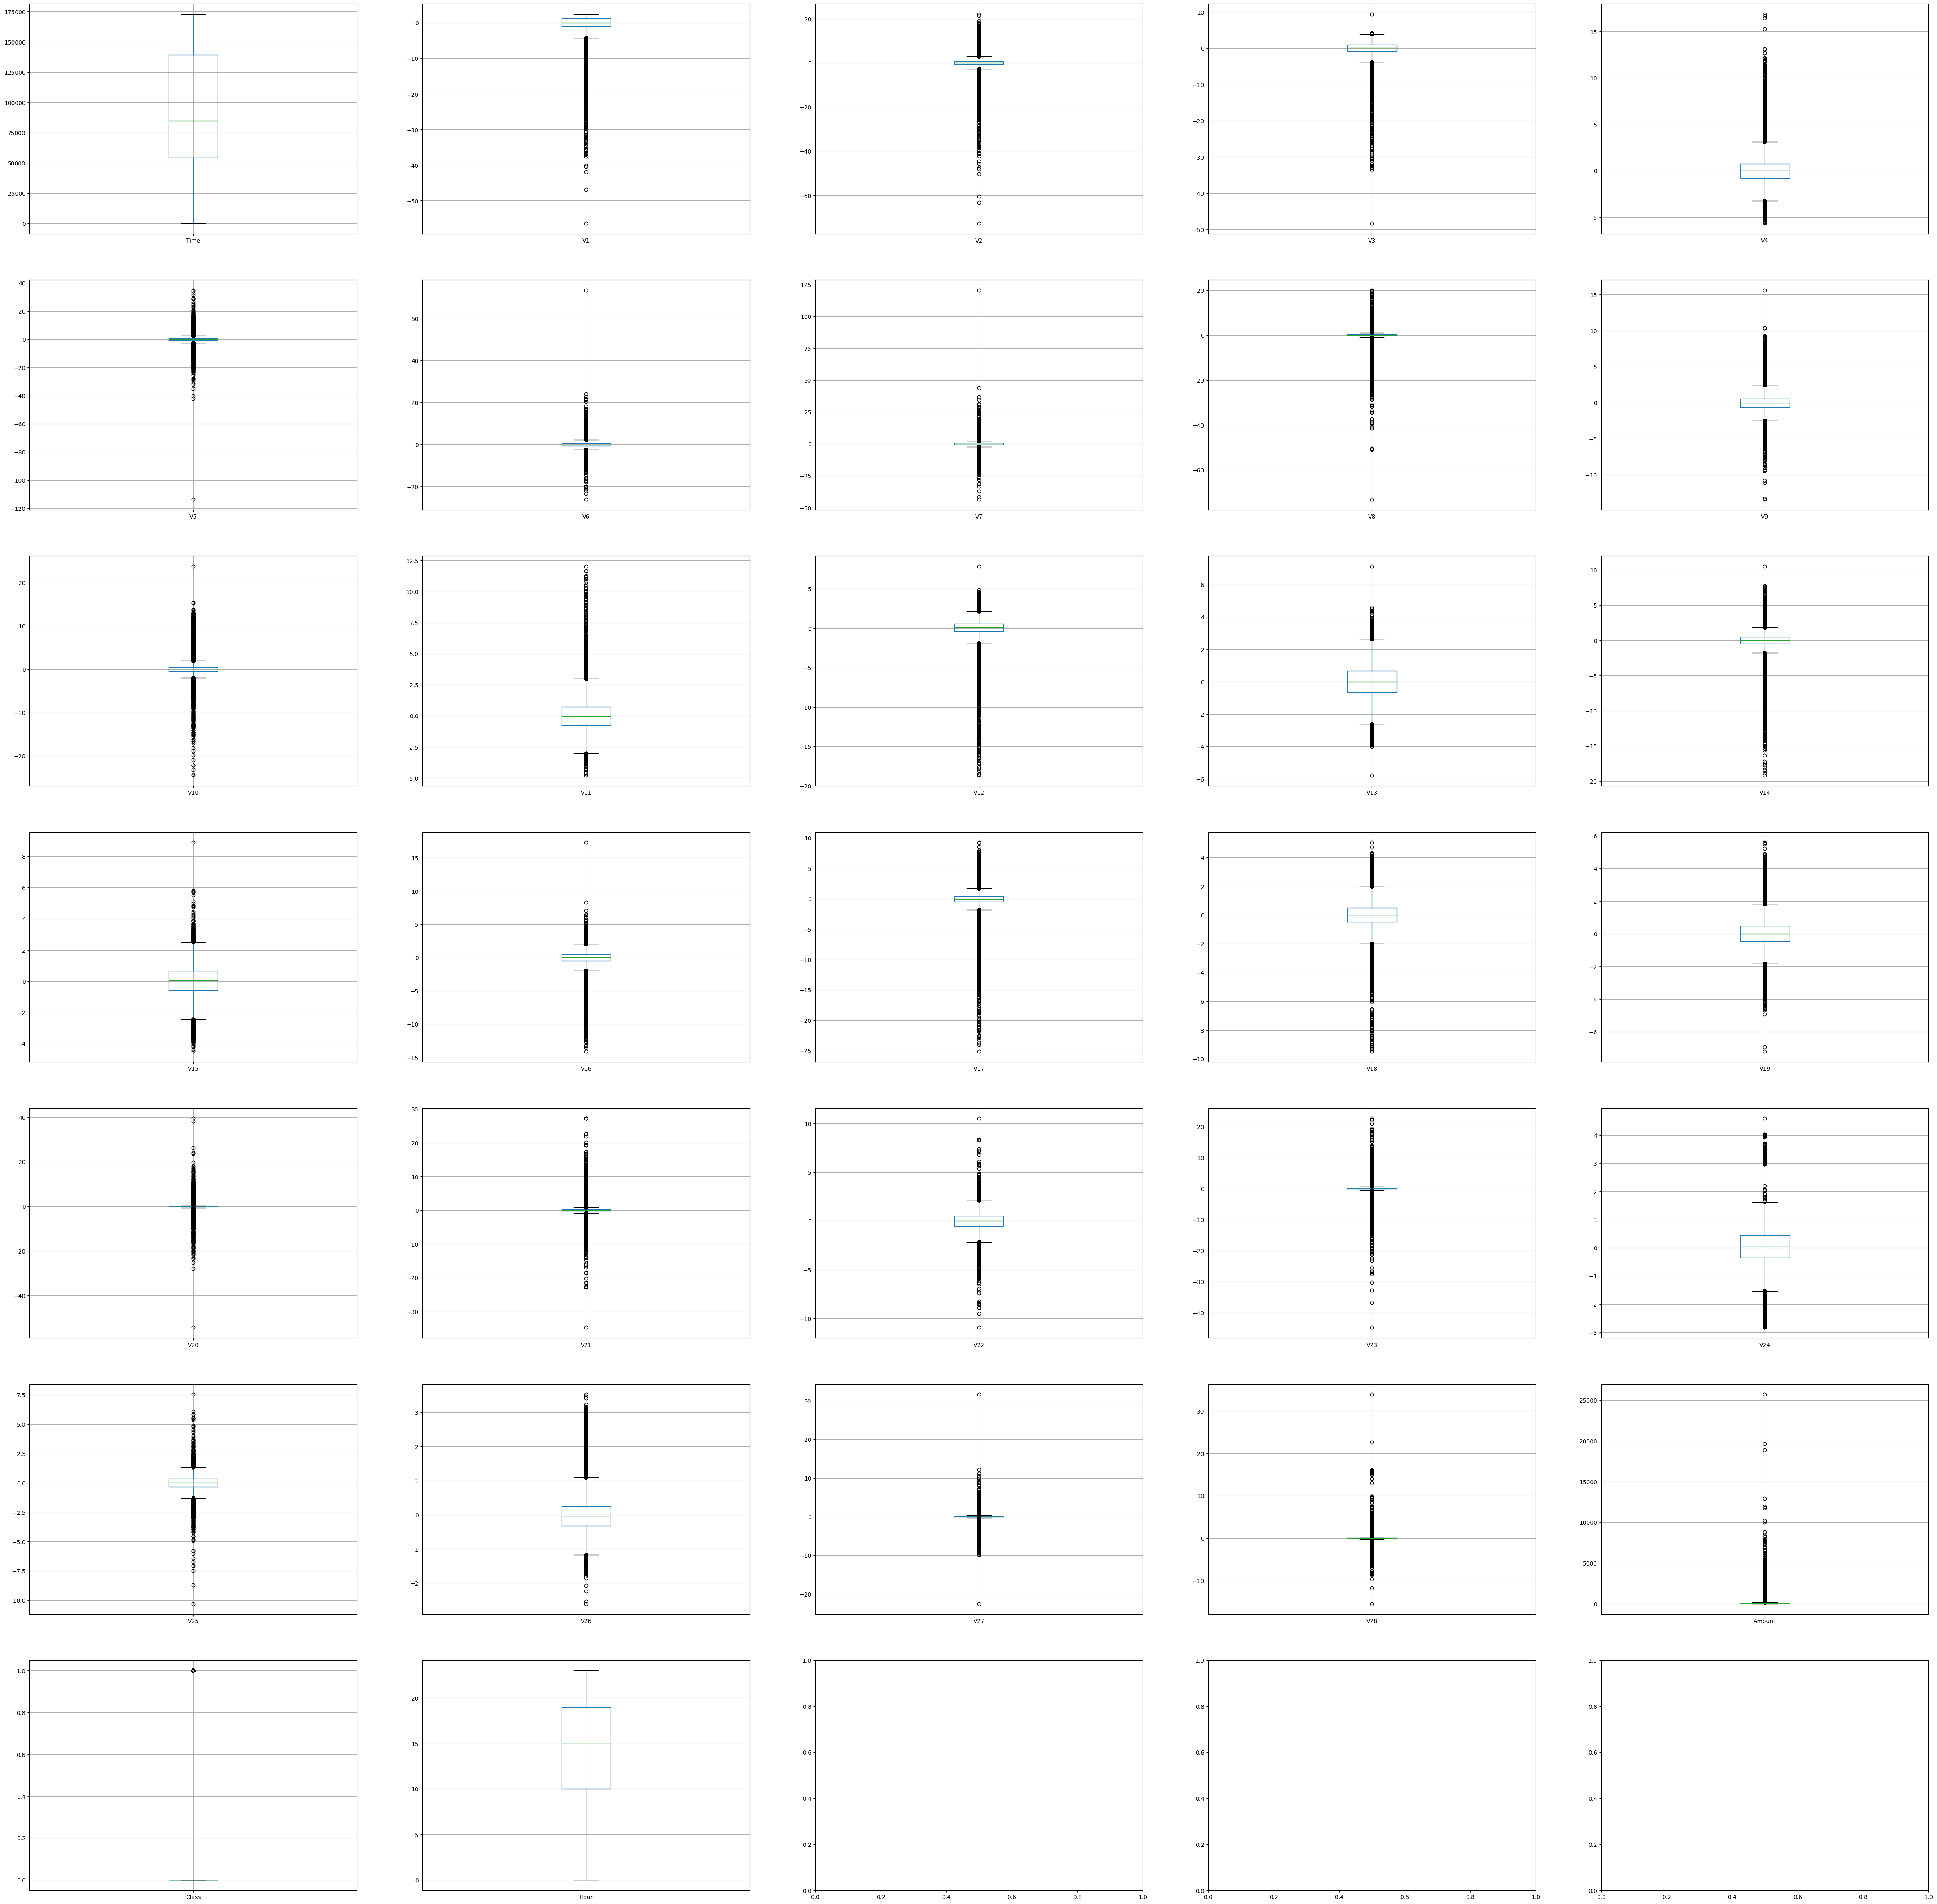

KeyError: "None of [Index(['outliers'], dtype='object')] are in the [columns]"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Then run the notebook
# Correct the path to the notebook if necessary.
# Verify the file 'EDA.ipynb' exists in the specified location.
%run /content/drive/MyDrive/Colab\ Notebooks/EDA.ipynb

# **Random Under Sampling, Over Sampling and SMOTE**

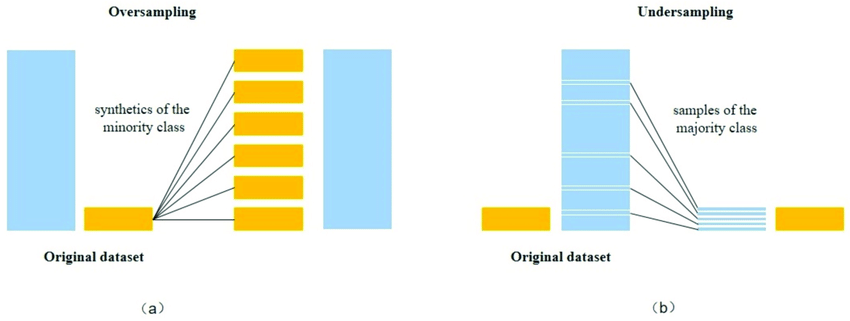

# **Random Undersampling**
1/Ensure randomness through random_state

In [4]:
# Shuffle original dataset
df = df.sample(frac=1, random_state=42)

# Separate majority and minority classes
fraud_df = df[df['Class'] == 1]       # Minority class (fraud)
non_fraud_df = df[df['Class'] == 0]   # Majority class (non-fraud)

# Randomly undersample the majority class to match the minority class count
non_fraud_undersampled_df = non_fraud_df.sample(n=len(fraud_df), random_state=42)

# Combine both classes (fraud and undersampled non-fraud)
undersampled_df = pd.concat([fraud_df, non_fraud_undersampled_df])

# Shuffle the new balanced DataFrame
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print(undersampled_df['Class'].value_counts())

# Preview
undersampled_df.head()

Class
0    492
1    492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,outliers
0,169518.0,-0.300026,0.949818,0.074290,0.933936,0.996314,-0.734827,1.065931,-0.046607,-0.682219,...,-0.253749,-0.004951,-0.059794,-0.392513,0.422035,0.234143,2.00,0,23.0,N
1,65385.0,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,...,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1354.25,1,18.0,Y
2,54608.0,0.786116,-1.067510,0.917200,0.885069,-0.987685,0.989969,-0.692766,0.296164,1.200257,...,-0.432923,-0.366233,0.546041,0.702749,-0.008153,0.037743,207.10,0,15.0,Y
3,56098.0,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,170.92,1,15.0,N
4,157284.0,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,...,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,0.77,1,19.0,N


# **Random Over Sampling**
1.   Option1: Manual Oversampling using Pandas
2.   Option2: Using RandomOverSampler from imblearn (preferred for modelling)

In [5]:
#Option1: Manual Oversampling using Pandas
import pandas as pd

# Shuffle original dataset
df = df.sample(frac=1, random_state=42)

# Separate majority and minority classes
fraud_df = df[df['Class'] == 1]       # Minority class
non_fraud_df = df[df['Class'] == 0]   # Majority class

# Oversample fraud (minority) class to match majority count
fraud_oversampled_df = fraud_df.sample(n=len(non_fraud_df), replace=True, random_state=42)

# Combine oversampled minority with majority class
oversampled_df = pd.concat([fraud_oversampled_df, non_fraud_df])

# Shuffle the new balanced DataFrame
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print(oversampled_df['Class'].value_counts())

# Preview
oversampled_df.head()

Class
0    284315
1    284315
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,outliers
0,44256.0,-0.438977,0.447125,-0.168274,-2.007589,2.702038,3.323821,0.330121,0.921663,0.033817,...,-0.079415,1.005403,-0.268008,-0.142315,0.100239,0.154578,5.77,0,12.0,N
1,84850.0,1.123262,-0.010713,0.342247,1.432438,-0.361418,-0.231414,-0.046947,0.097825,0.608800,...,-0.055216,0.025306,0.583637,-0.307347,0.022266,0.014958,28.94,0,23.0,N
2,28242.0,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,0.565835,0.303653,0.966914,-2.245882,...,1.752227,0.219925,0.156282,-0.265894,0.220694,0.256077,730.86,1,7.0,Y
3,98231.0,-2.080034,-1.000626,0.363301,-1.433983,3.827823,-1.928954,0.608587,-0.336071,0.592792,...,-0.356663,0.247271,1.469752,0.090129,-0.375236,-0.185668,18.23,0,3.0,N
4,124958.0,2.220689,-0.786339,-1.542123,-1.058925,-0.232187,-0.638747,-0.414663,-0.186544,-0.330418,...,0.283189,0.223223,-0.182321,-0.427207,-0.044847,-0.054426,25.50,0,10.0,N


In [7]:
from imblearn.over_sampling import RandomOverSampler
#Option2: Using RandomOverSampler from imblearn (preferred for modelling)
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

# Combine back into a DataFrame
model_ready_df = pd.concat([pd.DataFrame(X_oversampled, columns=X.columns),
                            pd.Series(y_oversampled, name='Class')], axis=1)

# Check class distribution
print(model_ready_df['Class'].value_counts())

# Preview
model_ready_df.head()

Class
0    284315
1    284315
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Hour,outliers,Class
0,72711.0,1.178598,0.165963,0.121668,1.092826,0.039454,-0.102678,0.035372,0.000913,0.106360,...,-0.161400,-0.462839,0.643265,-0.218767,0.025268,0.016461,29.99,20.0,N,0
1,57164.0,-0.754196,0.816714,1.900594,-0.204846,0.258701,-0.183295,0.847090,-0.008486,-0.600570,...,-0.367997,0.252736,0.403427,0.530817,0.080610,-0.116282,20.62,15.0,N,0
2,157256.0,-0.613051,0.984764,-0.090300,-0.795440,2.018146,-0.217026,1.562558,-0.253562,-1.155665,...,-0.851996,-1.294652,1.493782,0.198222,-0.020264,0.014614,13.23,19.0,N,0
3,39509.0,1.154826,0.166233,0.593458,0.502893,-0.315514,-0.307808,-0.093892,0.052094,-0.270624,...,0.173390,0.225906,0.094777,0.093054,-0.014995,0.008507,4.49,10.0,N,0
4,72427.0,-0.252670,1.023347,1.304723,0.411112,0.303165,-0.424341,0.591484,-0.022438,-0.676465,...,0.074943,0.051479,-0.789975,0.115854,0.156781,0.172765,0.99,20.0,N,0


# **SMOTE**

Step 1: Encoding Categorical Columns

In [8]:
from sklearn.preprocessing import LabelEncoder

# If you have categorical columns, you should encode them
X_encoded = X.copy()

# Example: Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

# If 'Class' column (y) is categorical, convert it to numeric as well
y_encoded = label_encoder.fit_transform(y)

Step 2: Apply SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_encoded, y_encoded)

# Combine back into a DataFrame
smote_balanced_df = pd.concat([pd.DataFrame(X_smote, columns=X_encoded.columns),
                               pd.Series(y_smote, name='Class')], axis=1)

# Check new class distribution
print(smote_balanced_df['Class'].value_counts())

# Preview the result
smote_balanced_df.head()

Class
0    284315
1    284315
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Hour,outliers,Class
0,72711.0,1.178598,0.165963,0.121668,1.092826,0.039454,-0.102678,0.035372,0.000913,0.106360,...,-0.161400,-0.462839,0.643265,-0.218767,0.025268,0.016461,29.99,20.0,0,0
1,57164.0,-0.754196,0.816714,1.900594,-0.204846,0.258701,-0.183295,0.847090,-0.008486,-0.600570,...,-0.367997,0.252736,0.403427,0.530817,0.080610,-0.116282,20.62,15.0,0,0
2,157256.0,-0.613051,0.984764,-0.090300,-0.795440,2.018146,-0.217026,1.562558,-0.253562,-1.155665,...,-0.851996,-1.294652,1.493782,0.198222,-0.020264,0.014614,13.23,19.0,0,0
3,39509.0,1.154826,0.166233,0.593458,0.502893,-0.315514,-0.307808,-0.093892,0.052094,-0.270624,...,0.173390,0.225906,0.094777,0.093054,-0.014995,0.008507,4.49,10.0,0,0
4,72427.0,-0.252670,1.023347,1.304723,0.411112,0.303165,-0.424341,0.591484,-0.022438,-0.676465,...,0.074943,0.051479,-0.789975,0.115854,0.156781,0.172765,0.99,20.0,0,0


**Data Frame Summary:**

1.   Random Under Sampling - undersampled_df
2.   Manual Oversampling	- oversampled_df
3.   RandomOverSampler - model_ready_df
4.   SMOTE - smote_balanced_df



# **Correlation**

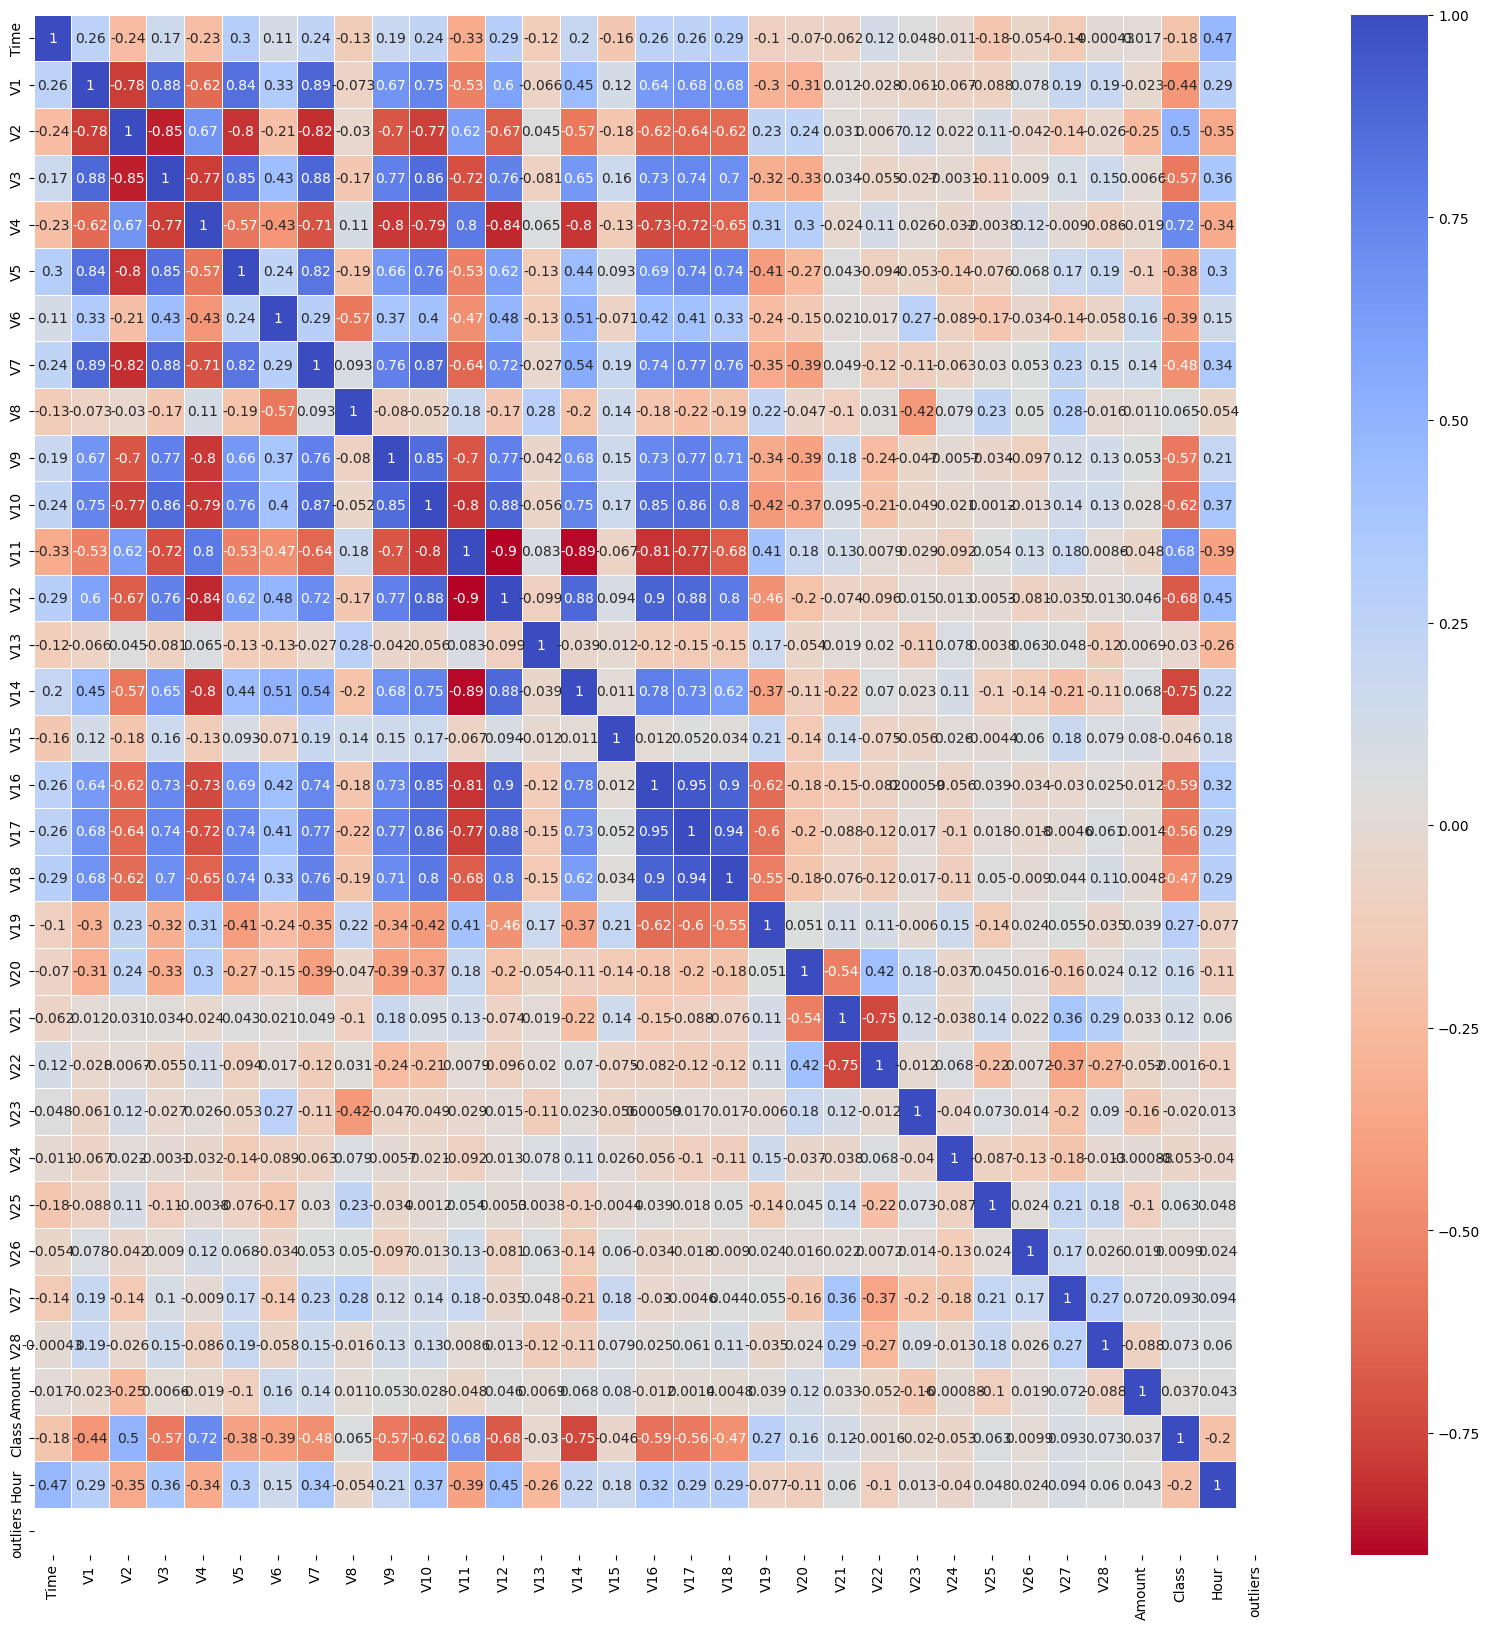

In [11]:
# Convert columns with 'N' to numeric, handling errors
for column in undersampled_df.columns:
    try:
        undersampled_df[column] = pd.to_numeric(undersampled_df[column], errors='coerce')  # Convert to numeric, replace errors with NaN
    except:
        # If conversion fails (e.g., due to mixed data types), handle as needed
        # For example, you might want to remove the column, perform one-hot encoding, etc.
        print(f"Column '{column}' could not be converted to numeric.")
        # ... (Your error handling logic here) ...

# Calculate the correlation matrix
sub_sample_corr = undersampled_df.corr()
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot = True, linewidths = .5, ax=ax)
plt.show()

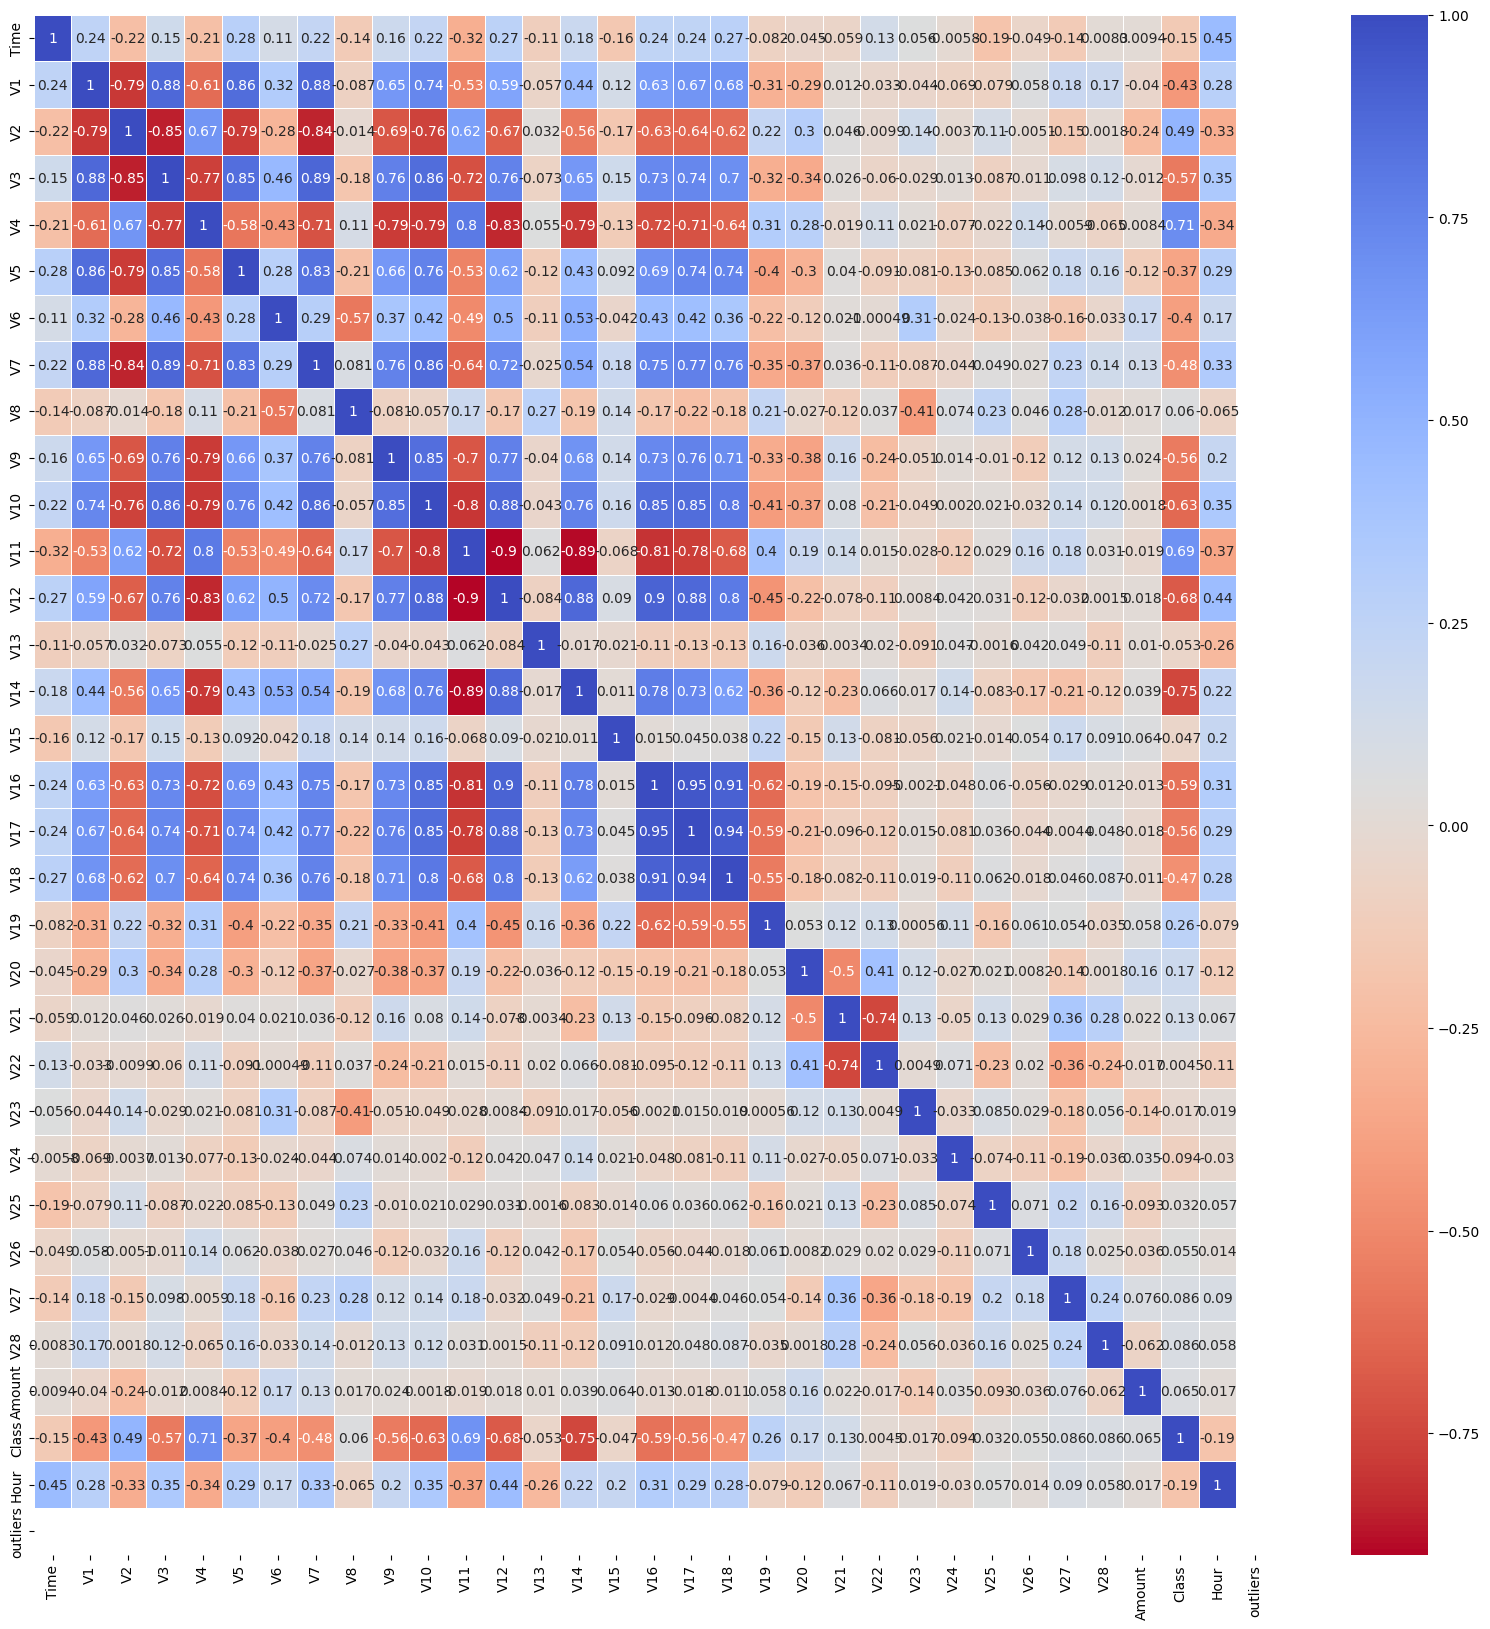

In [13]:
# Convert columns with 'N' to numeric, handling errors
for column in oversampled_df.columns:
    try:
        oversampled_df[column] = pd.to_numeric(oversampled_df[column], errors='coerce')  # Convert to numeric, replace errors with NaN
    except:
        # If conversion fails (e.g., due to mixed data types), handle as needed
        # For example, you might want to remove the column, perform one-hot encoding, etc.
        print(f"Column '{column}' could not be converted to numeric.")
        # ... (Your error handling logic here) ...

# Calculate the correlation matrix
sub_sample_corr = oversampled_df.corr()
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot = True, linewidths = .5, ax=ax)
plt.show()

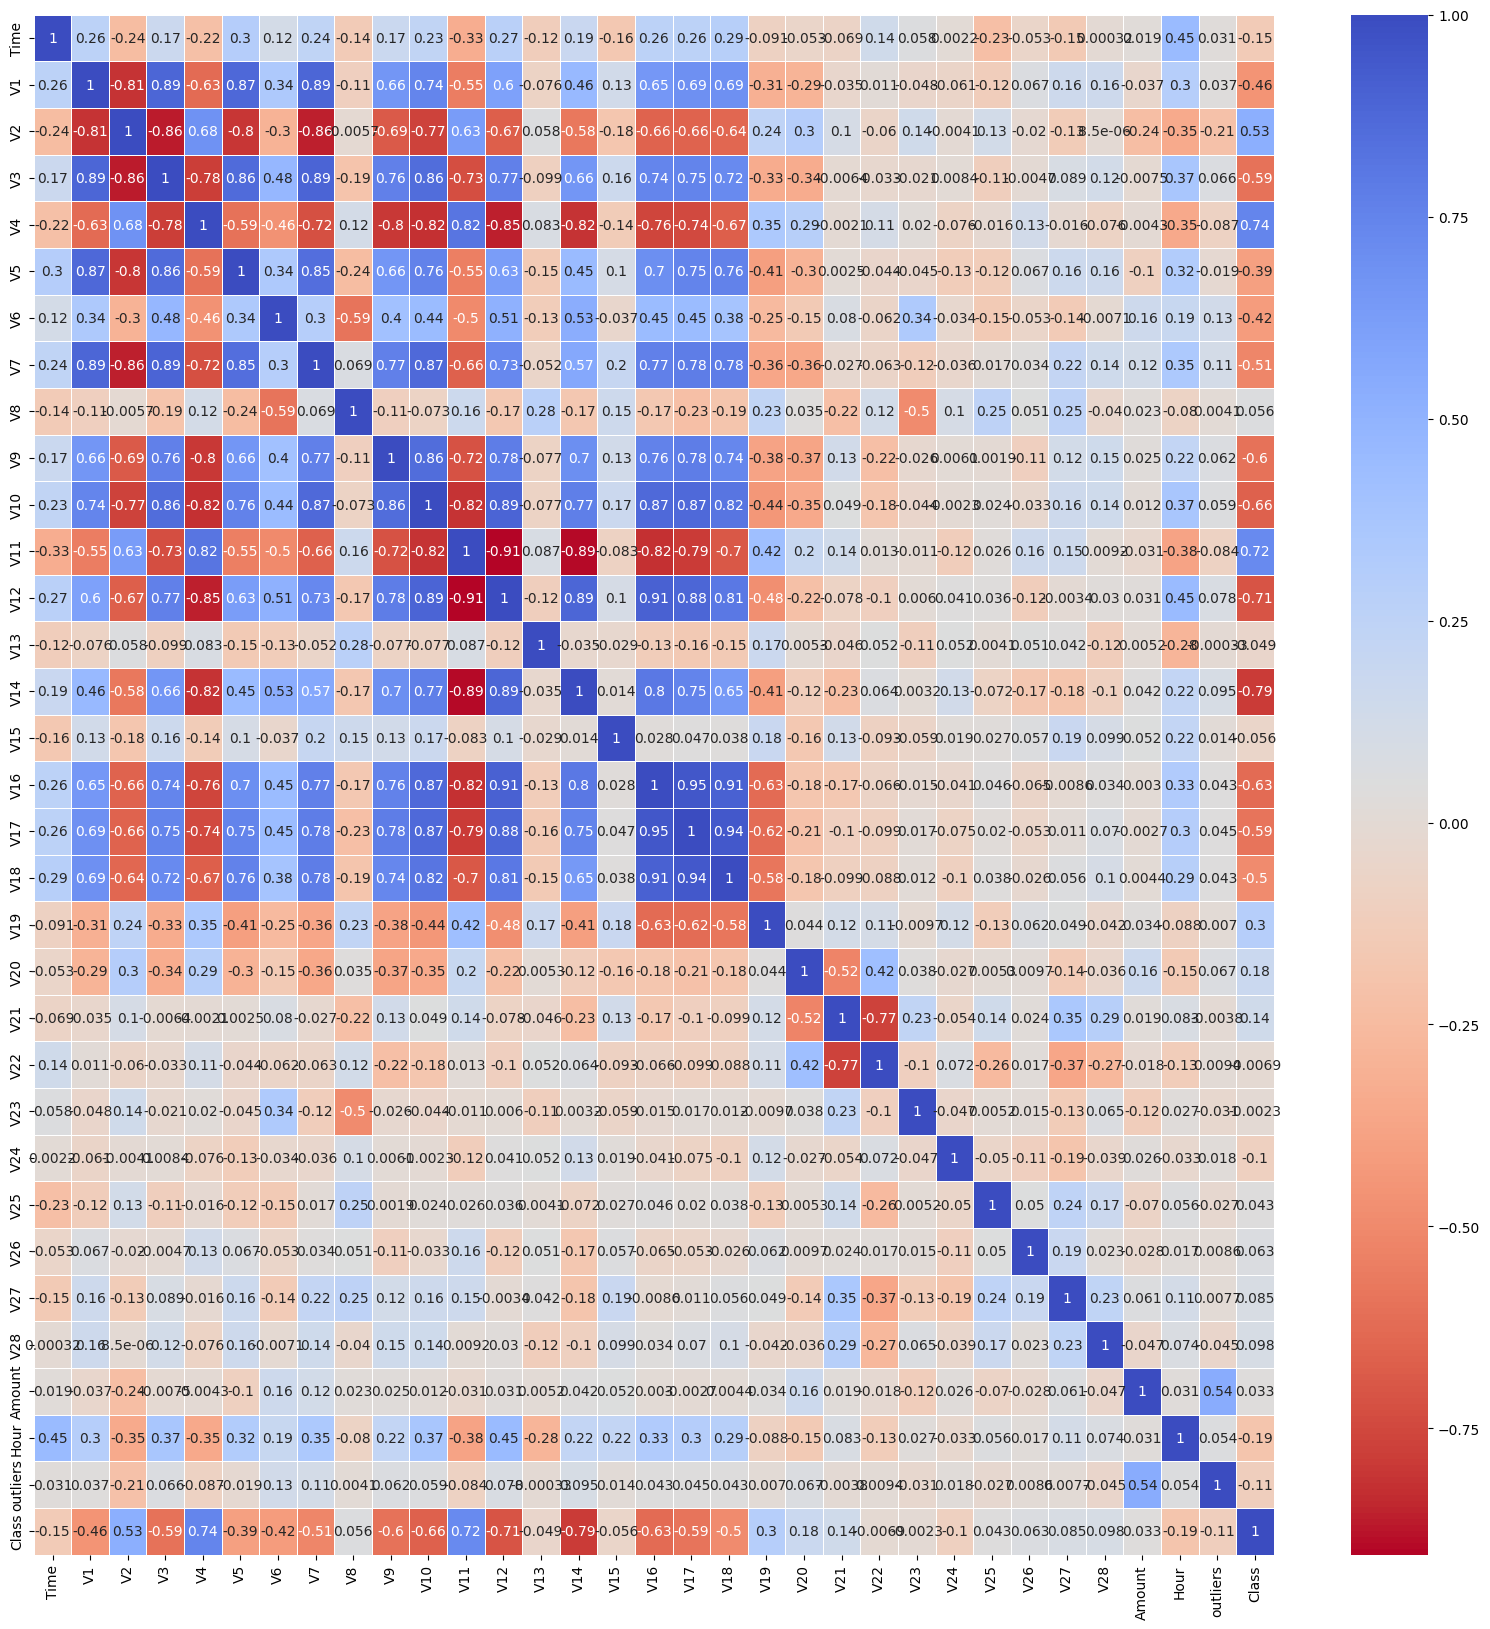

In [14]:
# Convert columns with 'N' to numeric, handling errors
for column in smote_balanced_df.columns:
    try:
        smote_balanced_df[column] = pd.to_numeric(smote_balanced_df[column], errors='coerce')  # Convert to numeric, replace errors with NaN
    except:
        # If conversion fails (e.g., due to mixed data types), handle as needed
        # For example, you might want to remove the column, perform one-hot encoding, etc.
        print(f"Column '{column}' could not be converted to numeric.")
        # ... (Your error handling logic here) ...

# Calculate the correlation matrix
sub_sample_corr = smote_balanced_df.corr()
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot = True, linewidths = .5, ax=ax)
plt.show()

# **Preprocessing**

In [18]:
import numpy as np

#Undersampled
X_undersampled = np.array(undersampled_df.drop("Class", axis=1))
y_undersampled = np.array(undersampled_df["Class"])

#Oversampled
X_oversampled = np.array(oversampled_df.drop("Class", axis=1))
y_oversampled = np.array(oversampled_df["Class"])

#SMOTE
X_smote = np.array(smote_balanced_df.drop("Class", axis=1))
y_smote = np.array(smote_balanced_df["Class"])

#Random Oversamper
X_random_oversampler = np.array(model_ready_df.drop("Class", axis=1))
y_random_oversampler = np.array(model_ready_df["Class"])

In [22]:
print("X_undersampled shape:", X_undersampled.shape)
print("X_oversampled shape:", X_oversampled.shape)
print("X_smote shape:", X_smote.shape)
print("X_random_oversampler shape:", X_random_oversampler.shape)
print("")
print("y_undersampled shape:", y_undersampled.shape)
print("y_oversampled shape:", y_oversampled.shape)
print("y_smote shape:", y_smote.shape)
print("y_random_oversampler shape:", y_random_oversampler.shape)

X_undersampled shape: (984, 32)
X_oversampled shape: (568630, 32)
X_smote shape: (568630, 32)
X_random_oversampler shape: (568630, 32)

y_undersampled shape: (984,)
y_oversampled shape: (568630,)
y_smote shape: (568630,)
y_random_oversampler shape: (568630,)


# **Splitting the data into train and test data**

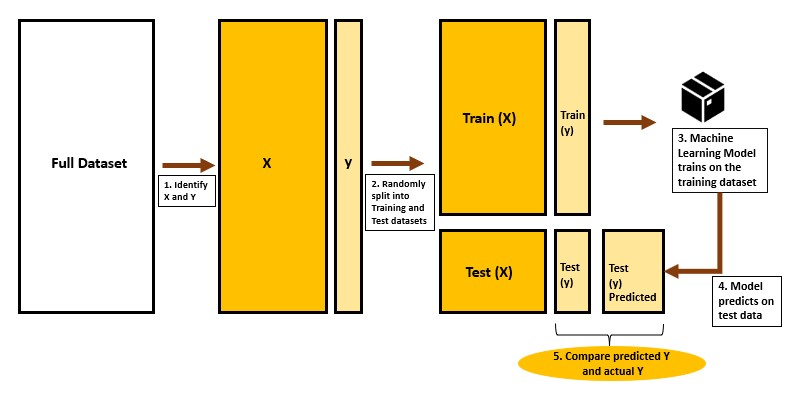



In [26]:
from sklearn.model_selection import train_test_split

X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, train_size = 0.7, random_state=42)
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, train_size = 0.7, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, train_size = 0.7, random_state=42)
X_train_random_oversampler, X_test_random_oversampler, y_train_random_oversampler, y_test_random_oversampler = train_test_split(X_random_oversampler, y_random_oversampler, train_size = 0.7, random_state=42)

In [27]:
print("X_train_undersampled shape:", X_train_undersampled.shape)
print("X_test_undersampled shape:", X_test_undersampled.shape)
print("X_train_oversampled shape:", X_train_oversampled.shape)
print("X_test_oversampled shape:", X_test_oversampled.shape)
print("X_train_smote shape:",X_train_smote.shape)
print("X_test_smote shape:",X_test_smote.shape)
print("X_train_smote shape:",X_train_random_oversampler.shape)
print("X_test_smote shape:",X_test_random_oversampler.shape)
print("")
print("y_train_undersampled shape:", y_train_undersampled.shape)
print("y_test_undersampled shape:", y_test_undersampled.shape)
print("y_train_oversampled shape:", y_train_oversampled.shape)
print("y_test_oversampled shape:", y_test_oversampled.shape)
print("y_train_smote shape:",y_train_smote.shape)
print("y_test_smote shape:",y_test_smote.shape)
print("y_train_random_oversampler shape:",y_train_random_oversampler.shape)
print("y_test_random_oversampler shape:",y_test_random_oversampler.shape)

X_train_undersampled shape: (688, 32)
X_test_undersampled shape: (296, 32)
X_train_oversampled shape: (398041, 32)
X_test_oversampled shape: (170589, 32)
X_train_smote shape: (398041, 32)
X_test_smote shape: (170589, 32)
X_train_smote shape: (398041, 32)
X_test_smote shape: (170589, 32)

y_train_undersampled shape: (688,)
y_test_undersampled shape: (296,)
y_train_oversampled shape: (398041,)
y_test_oversampled shape: (170589,)
y_train_smote shape: (398041,)
y_test_smote shape: (170589,)
y_train_random_oversampler shape: (398041,)
y_test_random_oversampler shape: (170589,)


## **Modeling**


1.   Logistic Regression
2.   XG Boost
3.   SVM's
4.   Decision Trees
5.   Random Forest Classifier

**Logistic Regression**

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_undersampled) # Instantiated the StandardScaler using ()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [30]:
X_train_revised_undersampled = scaler.transform(X_train_undersampled) # Scaled the training data
X_test_revised_undersampled = scaler.transform(X_test_undersampled)

In [34]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression from sklearn.linear_model

logreg = LogisticRegression() # Create an instance of LogisticRegression
logreg.fit(X_train_revised_undersampled, y_train_undersampled)
log_pred = logreg.predict(X_test_revised_undersampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
log_acc = accuracy_score(y_test_undersampled, log_pred)*100
log_acc

90.87837837837837

In [45]:
log_conf_undersampled = confusion_matrix(y_test_undersampled, log_pred)

log_undersampled_df = pd.DataFrame(data=log_conf_undersampled, columns = [["Pred:Not Fraud", "Pred:Fraud"]], index = [["Actual:Not Fraud", "Actual: Fraud"]])
log_undersampled_df

,Pred:Not Fraud,Pred:Fraud
Actual:Not Fraud,129,5
Actual: Fraud,22,140
